<a href="https://colab.research.google.com/github/aman-aswal/EDA_for_Vision_Infrastructure_Internship_Project/blob/main/EDA_for_Vision_Infrastructure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install if missing
!pip install pandas numpy matplotlib seaborn plotly

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/VisionInfra_CourseSales_IndianMarket_Refreshed.csv")

# Initial look
df.head()
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Course_ID           300 non-null    object 
 1   Course_Name         300 non-null    object 
 2   Instructor_Name     300 non-null    object 
 3   Category            300 non-null    object 
 4   Price               300 non-null    int64  
 5   Discount            300 non-null    int64  
 6   Enrollment_Date     300 non-null    object 
 7   User_ID             300 non-null    object 
 8   City                300 non-null    object 
 9   State               300 non-null    object 
 10  Completion_Status   300 non-null    object 
 11  Rating              300 non-null    int64  
 12  Refund_Status       300 non-null    object 
 13  Marketing_Channel   300 non-null    object 
 14  Final_Price         300 non-null    float64
 15  Enrollment_Month    300 non-null    object 
 16  Enrollme

Index(['Course_ID', 'Course_Name', 'Instructor_Name', 'Category', 'Price',
       'Discount', 'Enrollment_Date', 'User_ID', 'City', 'State',
       'Completion_Status', 'Rating', 'Refund_Status', 'Marketing_Channel',
       'Final_Price', 'Enrollment_Month', 'Enrollment_Quarter'],
      dtype='object')

In [ ]:
df.isnull().sum()
df["Enrollment_Date"] = pd.to_datetime(df["Enrollment_Date"])


In [ ]:
df["Revenue"] = df["Final_Price"]
df["Year"] = df["Enrollment_Date"].dt.year
df["Month"] = df["Enrollment_Date"].dt.month_name()
df["Quarter"] = df["Enrollment_Date"].dt.quarter


<Axes: xlabel='Category', ylabel='count'>

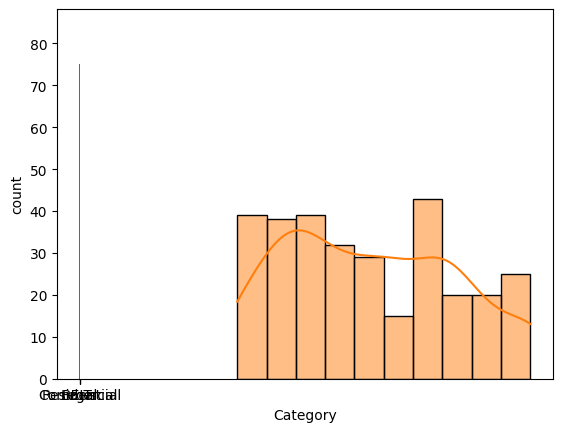

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Category')
sns.histplot(df['Final_Price'], kde=True)


<Axes: xlabel='Category', ylabel='Final_Price'>

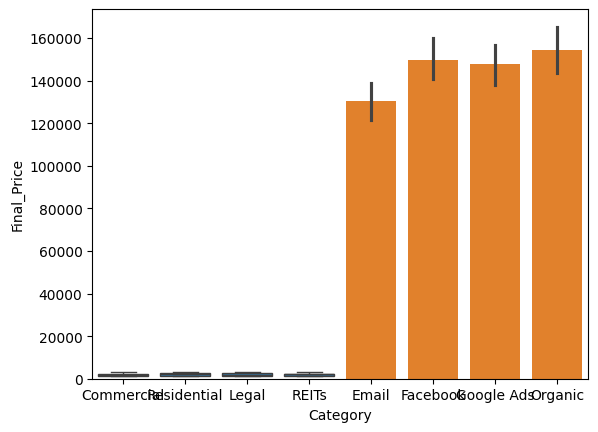

In [ ]:
sns.boxplot(x='Category', y='Final_Price', data=df)
sns.barplot(x='Marketing_Channel', y='Revenue', data=df, estimator=sum)


<Axes: xlabel='Enrollment_Month', ylabel='Revenue'>

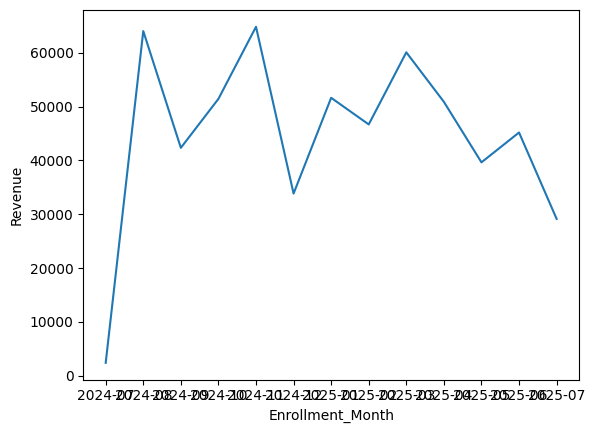

In [ ]:
monthly_data = df.groupby("Enrollment_Month")["Revenue"].sum().reset_index()
sns.lineplot(data=monthly_data, x='Enrollment_Month', y='Revenue')


# Task
Analyze the dataset "/VisionInfra_CourseSales_IndianMarket_Refreshed.csv" to generate visualizations that will help the company make informed decisions.

## Analyze revenue trends over time

### Subtask:
Visualize the monthly and quarterly revenue to identify seasonal patterns or growth trends.


**Reasoning**:
Create line plot for monthly revenue and bar plot for quarterly revenue and add titles and labels.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

# Load the dataset (Assuming the file is in the same directory or accessible path)
try:
    df = pd.read_csv("/VisionInfra_CourseSales_IndianMarket_Refreshed.csv")
except FileNotFoundError:
    print("Error: Dataset file not found. Please make sure 'VisionInfra_CourseSales_IndianMarket_Refreshed.csv' is in the correct path.")
    exit()

# Preprocessing steps (from previous cells)
df["Enrollment_Date"] = pd.to_datetime(df["Enrollment_Date"])
df["Revenue"] = df["Final_Price"]
df["Year"] = df["Enrollment_Date"].dt.year
df["Month"] = df["Enrollment_Date"].dt.month_name()
df["Quarter"] = df["Enrollment_Date"].dt.quarter


monthly_data = df.groupby(df["Enrollment_Date"].dt.to_period("M"))["Revenue"].sum().reset_index()
monthly_data["Enrollment_Date"] = monthly_data["Enrollment_Date"].astype(str)

# Enhanced Monthly Revenue Plot using Plotly Express
fig_monthly = px.line(monthly_data, x='Enrollment_Date', y='Revenue', title='Monthly Revenue Trend (Interactive)')
fig_monthly.update_layout(xaxis_title='Enrollment Month', yaxis_title='Revenue')
fig_monthly.show()

quarterly_data = df.groupby('Enrollment_Quarter')['Revenue'].sum().reset_index()

# Enhanced Quarterly Revenue Plot using Plotly Express
fig_quarterly = px.bar(quarterly_data, x='Enrollment_Quarter', y='Revenue', title='Quarterly Revenue Distribution (Interactive)')
fig_quarterly.update_layout(xaxis_title='Enrollment Quarter', yaxis_title='Revenue')
fig_quarterly.show()

## Identify top performing courses

### Subtask:
Create a bar chart showing the total revenue generated by each course to identify the most profitable ones.


**Reasoning**:
Group the DataFrame by 'Course_Name', calculate the sum of 'Revenue' for each course, sort the results, and create a bar plot to visualize the total revenue by course.



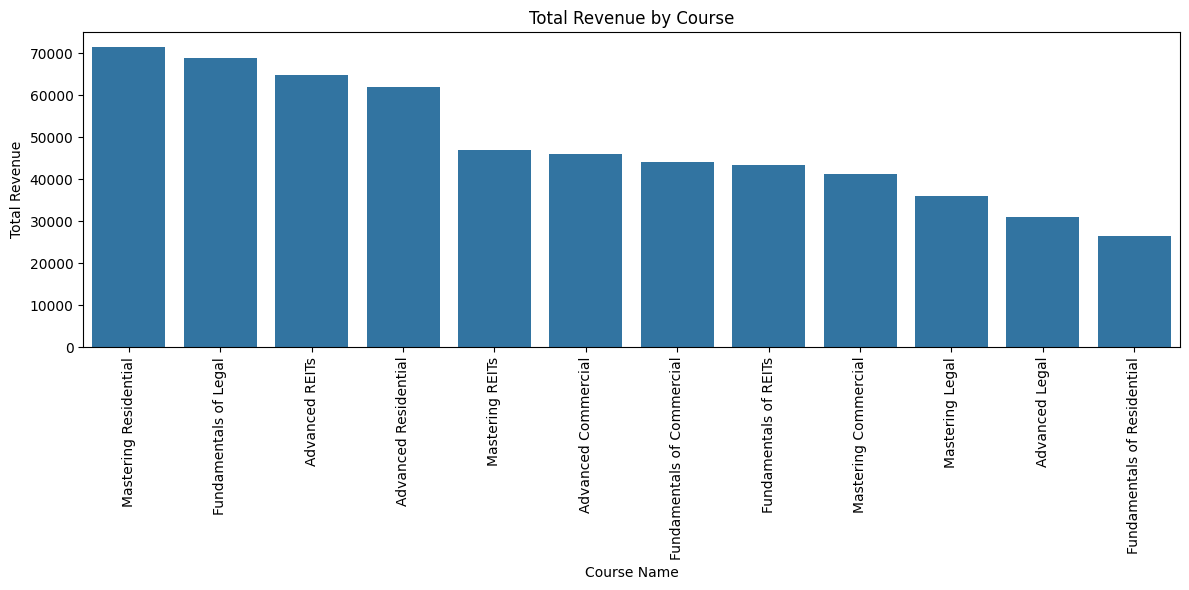

In [ ]:
course_revenue = df.groupby("Course_Name")["Revenue"].sum().reset_index()
course_revenue_sorted = course_revenue.sort_values(by="Revenue", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Course_Name', y='Revenue', data=course_revenue_sorted)
plt.title("Total Revenue by Course")
plt.xlabel("Course Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Analyze sales by location

### Subtask:
Visualize sales by state or city to understand geographical performance and target marketing efforts.


**Reasoning**:
Group the DataFrame by 'State', calculate the sum of 'Revenue', sort by revenue, and create a bar plot to visualize the total revenue by state, including appropriate labels and title.



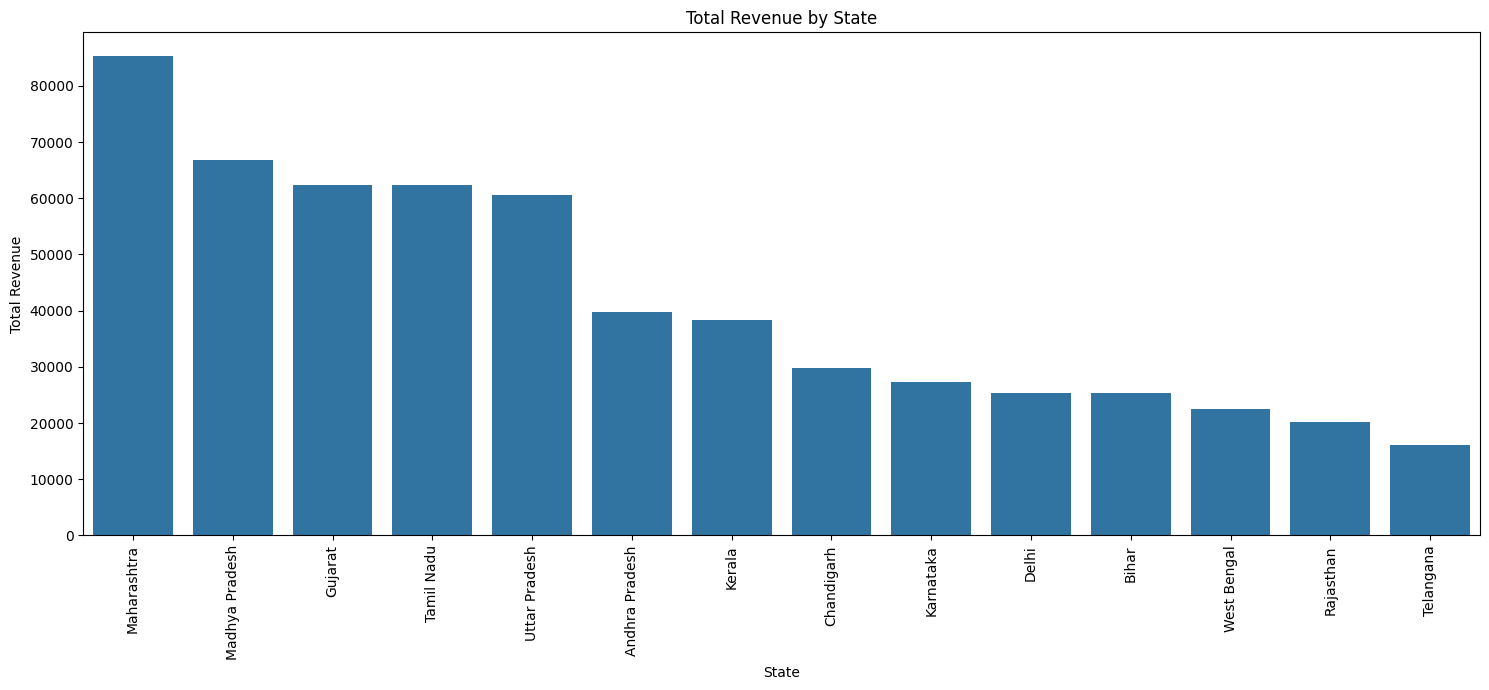

In [ ]:
state_revenue = df.groupby("State")["Revenue"].sum().reset_index()
state_revenue_sorted = state_revenue.sort_values(by="Revenue", ascending=False)

plt.figure(figsize=(15, 7))
sns.barplot(x='State', y='Revenue', data=state_revenue_sorted)
plt.title("Total Revenue by State")
plt.xlabel("State")
plt.ylabel("Total Revenue")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous plot shows revenue by state. Now, group the DataFrame by 'City', calculate the sum of 'Revenue', sort by revenue, and create a bar plot to visualize the total revenue by city, including appropriate labels and title.



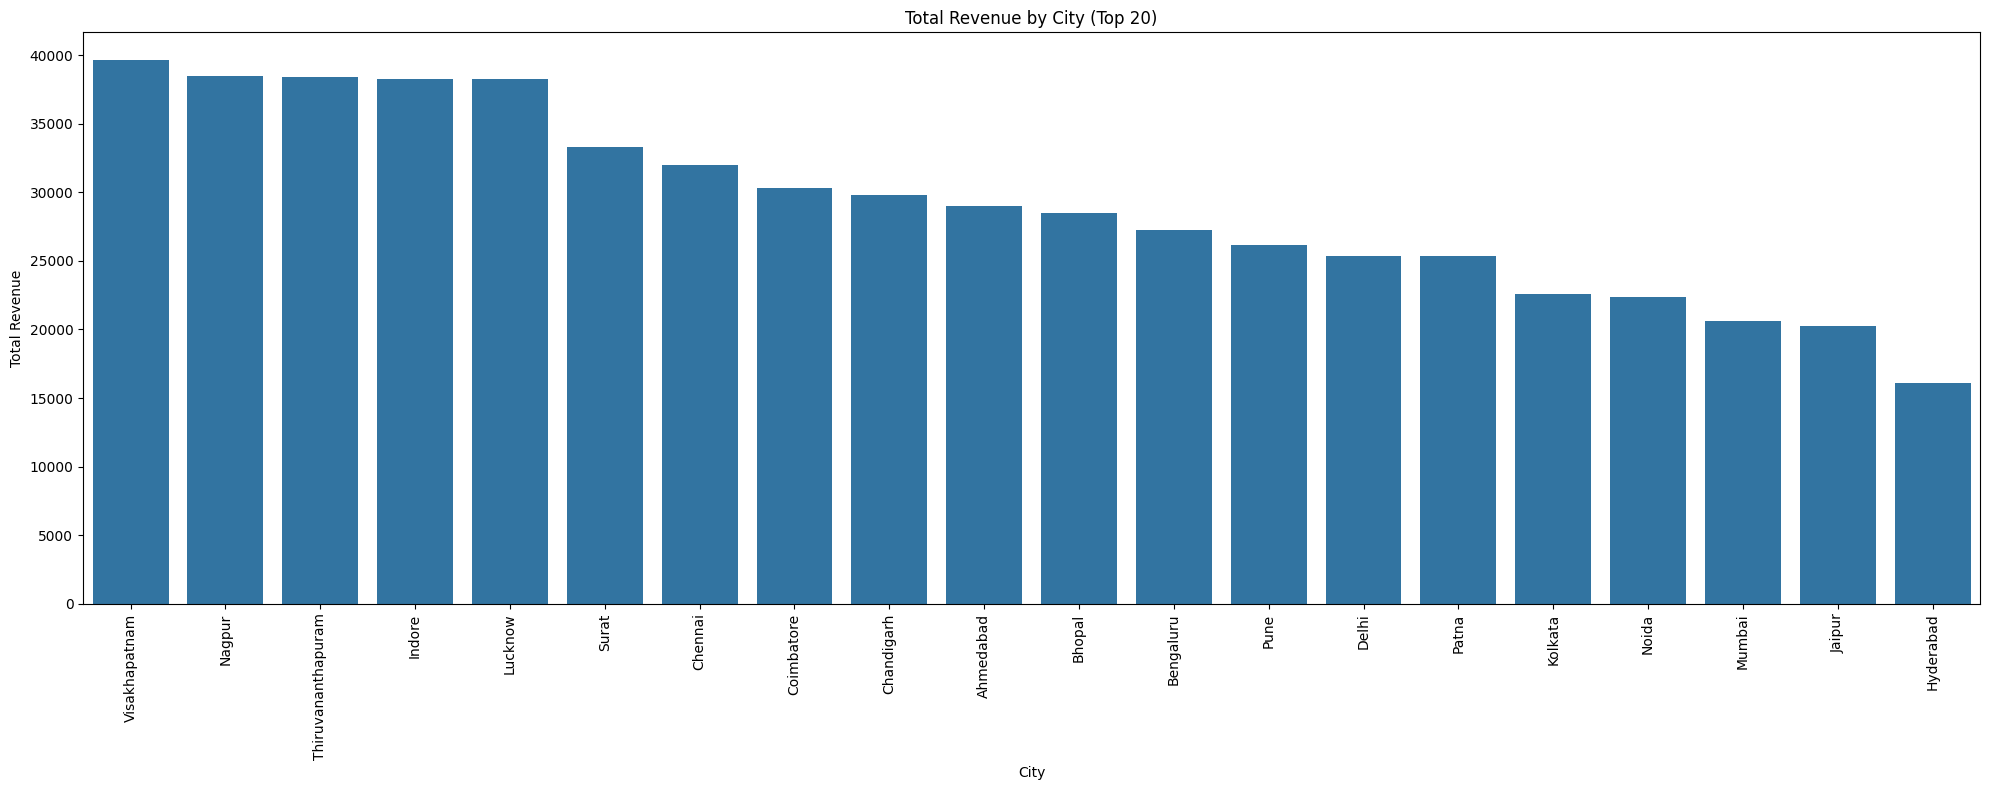

In [ ]:
city_revenue = df.groupby("City")["Revenue"].sum().reset_index()
city_revenue_sorted = city_revenue.sort_values(by="Revenue", ascending=False)

plt.figure(figsize=(20, 8))
sns.barplot(x='City', y='Revenue', data=city_revenue_sorted.head(20)) # Displaying top 20 cities for readability
plt.title("Total Revenue by City (Top 20)")
plt.xlabel("City")
plt.ylabel("Total Revenue")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Examine completion rates

### Subtask:
Explore the distribution of completion statuses to understand how many users are finishing the courses.


**Reasoning**:
Create a count plot to visualize the distribution of course completion statuses.



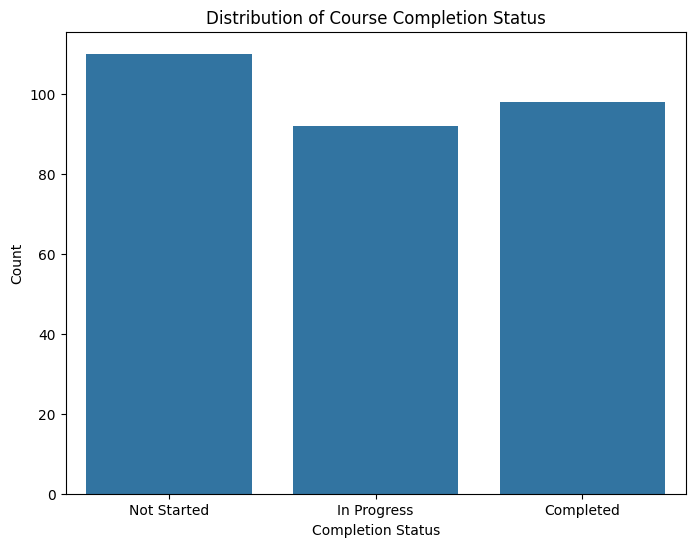

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Completion_Status')
plt.title('Distribution of Course Completion Status')
plt.xlabel('Completion Status')
plt.ylabel('Count')
plt.show()

## Analyze instructor performance

### Subtask:
Visualize revenue or enrollment counts per instructor to identify top instructors.


**Reasoning**:
Group the data by instructor, calculate the sum of revenue, sort the results, and create a bar plot to visualize the revenue per instructor.



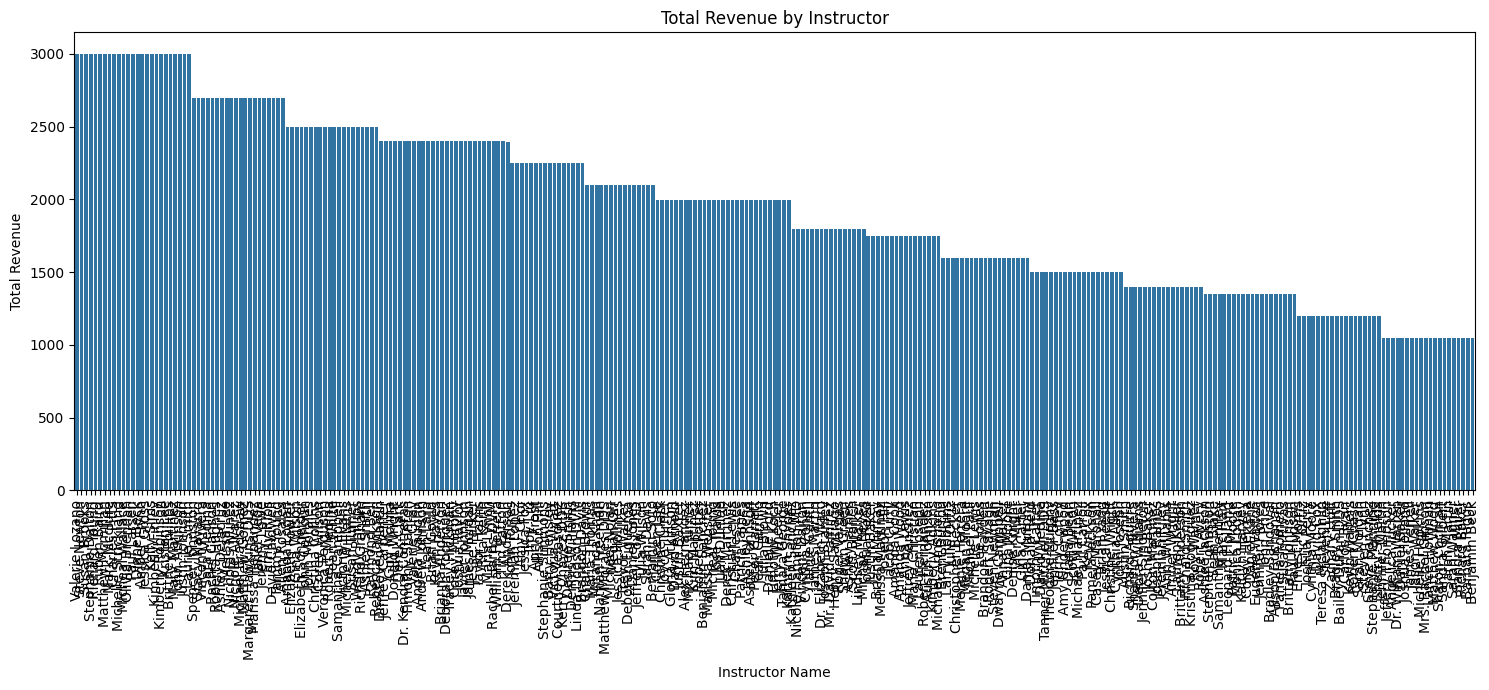

In [ ]:
instructor_revenue = df.groupby("Instructor_Name")["Revenue"].sum().reset_index()
instructor_revenue_sorted = instructor_revenue.sort_values(by="Revenue", ascending=False)

plt.figure(figsize=(15, 7))
sns.barplot(x='Instructor_Name', y='Revenue', data=instructor_revenue_sorted)
plt.title("Total Revenue by Instructor")
plt.xlabel("Instructor Name")
plt.ylabel("Total Revenue")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Compare marketing channel effectiveness

### Subtask:
Create a more detailed comparison of marketing channels, perhaps looking at revenue per channel over time or completion rates by channel.


**Reasoning**:
Group the data by marketing channel and calculate the total revenue for each channel, then create a bar plot to visualize the total revenue by marketing channel.



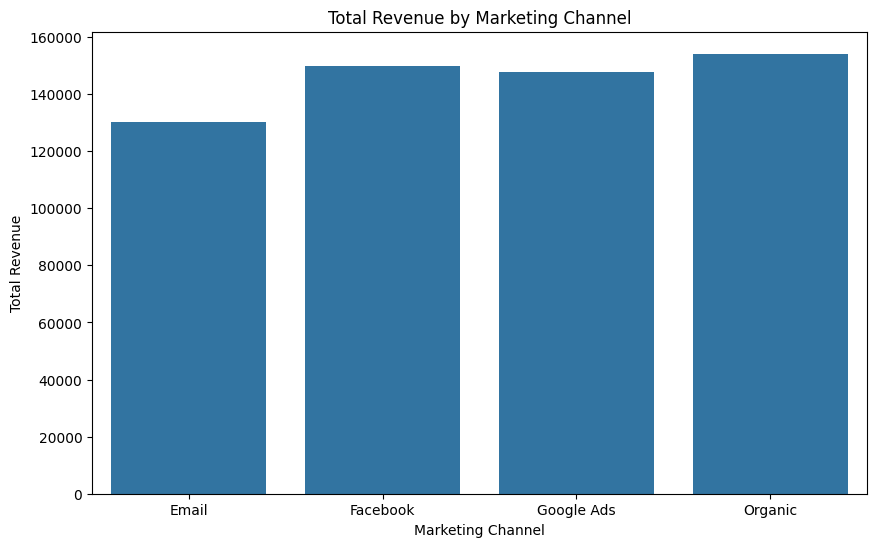

In [ ]:
channel_revenue = df.groupby('Marketing_Channel')['Revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Marketing_Channel', y='Revenue', data=channel_revenue)
plt.title("Total Revenue by Marketing Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("Total Revenue")
plt.show()

**Reasoning**:
Group the data by marketing channel and completion status to count the occurrences of each combination, then unstack the result and create a stacked bar plot to visualize completion rates by marketing channel.



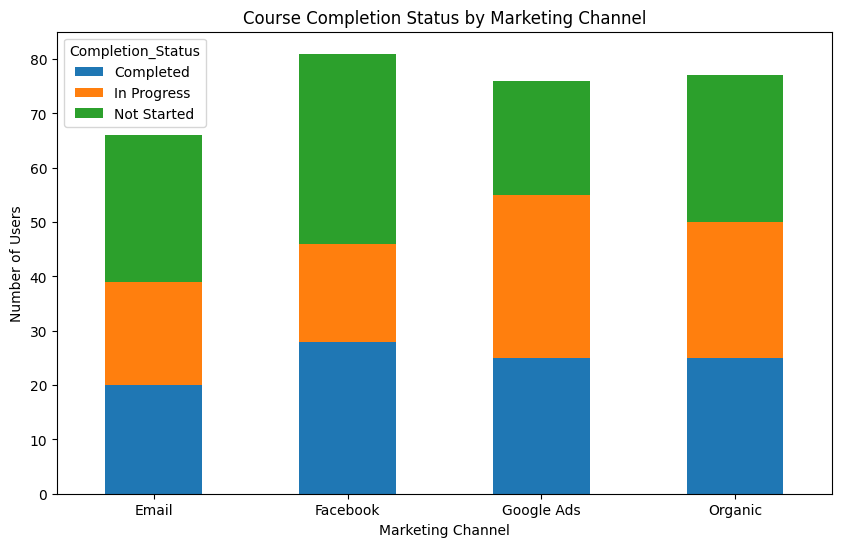

In [ ]:
completion_by_channel = df.groupby(['Marketing_Channel', 'Completion_Status']).size().reset_index(name='Count')
completion_by_channel_unstacked = completion_by_channel.pivot(index='Marketing_Channel', columns='Completion_Status', values='Count').fillna(0)

completion_by_channel_unstacked.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Course Completion Status by Marketing Channel")
plt.xlabel("Marketing Channel")
plt.ylabel("Number of Users")
plt.xticks(rotation=0)
plt.show()

## Summary:

### Data Analysis Key Findings

*   Monthly and quarterly revenue visualizations were generated, showing potential seasonal patterns or growth trends over time.
*   The bar chart of "Total Revenue by Course" allows for easy identification of the top-performing courses based on revenue.
*   Visualizations of "Total Revenue by State" and "Total Revenue by City (Top 20)" were created to understand geographical sales performance.
*   A count plot showing the "Distribution of Course Completion Status" was generated, indicating the proportion of users who completed courses versus those who did not.
*   The bar chart of "Total Revenue by Instructor" helps in identifying top instructors based on their revenue contribution.
*   Two visualizations comparing marketing channel effectiveness were created: "Total Revenue by Marketing Channel" and "Course Completion Status by Marketing Channel." The revenue plot shows the profitability of each channel, while the completion status plot indicates the quality of leads from each channel in terms of course completion rates.

### Insights or Next Steps

*   Based on the revenue trends and top-performing courses, consider increasing investment in the most profitable courses or marketing efforts during peak revenue periods.
*   Analyze the completion rates by marketing channel to understand which channels bring in users who are more likely to complete courses, and potentially optimize marketing strategies to target these channels.


## Visualize Distribution of Categories and Completion Status with Pie Charts

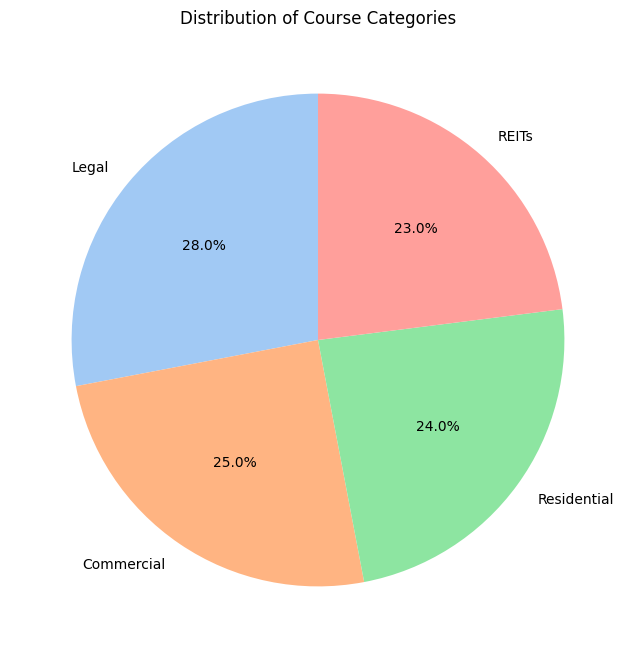

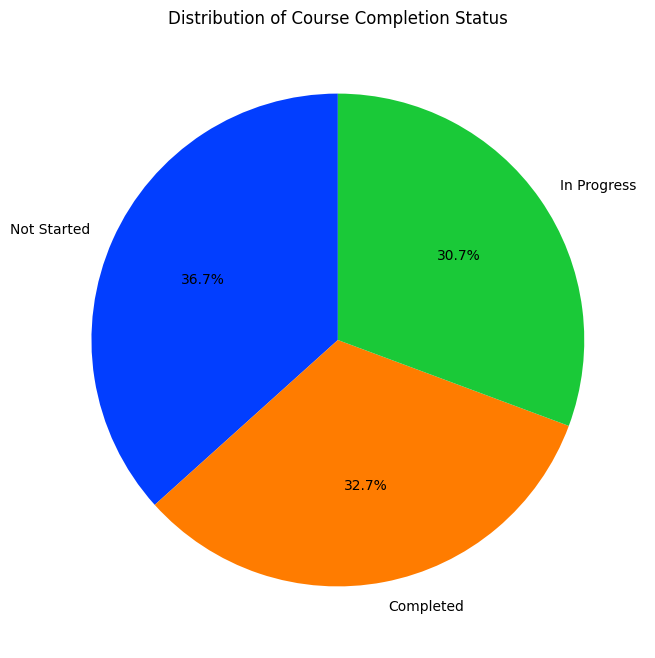

In [ ]:
import matplotlib.pyplot as plt

# Pie chart for Category distribution
category_counts = df['Category'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Course Categories')
plt.show()

# Pie chart for Completion Status distribution
completion_counts = df['Completion_Status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(completion_counts, labels=completion_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('bright'))
plt.title('Distribution of Course Completion Status')
plt.show()